<a href="https://colab.research.google.com/github/PMabwa/airbnb-recommender-system/blob/kelvin2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Recommender System

![Cape Town image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/top-air-bnb-cape-town-south-africa.jpg?raw=1)

## Overview

This project aims to develop a data-driven model to analyze patterns in Airbnb listings and generate insights to optimize pricing, occupancy rates, and customer satisfaction for hosts in Cape Town. Using data from [Inside Airbnb](https://insideairbnb.com/get-the-data/), the model will be trained on various features such as property type, location, amenities, reviews, price, and host activity.

This system can benefit hosts, property managers, and tourism platforms by providing actionable insights into market trends and property performance. It will involve several stages, including data cleaning, exploratory data analysis (EDA), feature engineering, model selection, and evaluation.

Throughout the project, we will explore relationships between property features and key performance indicators, such as pricing and occupancy rates, to identify factors driving success. Advanced modeling techniques, such as regression analysis and machine learning models, will help predict optimal listing prices and understand the dynamics of customer behavior.

By developing a robust predictive model, this project can offer practical applications for the short-term rental market in Cape Town. Hosts and property managers can leverage these insights to improve competitiveness, enhance guest satisfaction, and optimize revenue management strategies.

## Business Understanding

The short-term rental industry is highly competitive, with Airbnb hosts and property managers striving to optimize occupancy rates, maximize revenue, and enhance guest satisfaction. Cape Town’s thriving tourism sector adds further pressure for hosts to stay competitive by offering well-priced, attractive listings with positive guest experiences.

A key challenge for hosts lies in setting optimal prices and maintaining high occupancy rates while delivering quality services. Factors such as location, amenities, and guest reviews play a significant role in determining a listing’s success. However, managing these elements manually can be complex and time-consuming, especially with market conditions that are constantly changing.

The business value of this project lies in its ability to provide hosts and property managers with actionable insights. By developing a model that can predict optimal listing prices and identify factors driving higher occupancy and guest satisfaction, this project can help improve revenue management and customer experience. These insights can empower hosts to make data-informed decisions, enhancing their market competitiveness and boosting profitability.

**Objective/ Business Problem:**

> ***Build a predictive model that analyzes Airbnb listings in Cape Town to identify patterns and provide insights into optimal pricing, occupancy rates, and guest satisfaction.***

## Data Understanding

The data used in this project can be found [here](https://insideairbnb.com/get-the-data/). It is sourced from [`insideairbnb.com`](https://insideairbnb.com) and contains detailed information about Airbnb listings in Cape Town. The dataset provides insights into various aspects of each listing, including property details, host information, pricing, reviews, and availability.

Given the dataset contains ***87*** columns, listing them all here would be impractical. For a full description of the features and their meanings, please refer to the comprehensive feature list available in this [Google Doc](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596).

The key data files are as follows:

1. `listings.csv` – Contains detailed information about each property listing. Each record represents one listing and includes features such as property type, price, location, and review scores.
2. `calendar.csv` – Provides availability and pricing data for each listing across multiple dates.
3. `reviews.csv` – Contains individual reviews left by guests, along with the date of the review and guest details.

Each listing is uniquely identified across files, allowing for merging and analysis across datasets. This rich, multi-dimensional data will enable us to extract valuable insights into factors influencing pricing, occupancy, and guest satisfaction.

## Data Preparation and Cleaning

In this section, we are going to do the following:

1. Import the necessary libraries.
2. Preview data and ensure they are of correct datatypes.
3. Load our datasets and merge them to have a final unified dataset.
4. Check for missing values & handle them.
5. Check for duplicates & handle them.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [ ]:
# # load the datasets
# # load calendar
# calendar_df = pd.read_csv('/content/calendar.csv.gz', compression='gzip', low_memory=False)
# calendar_df.head()

In [2]:
# load listings
listings_df = pd.read_csv('/content/listings.csv.gz', compression='gzip')
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47


In [3]:
listings_df.dropna(subset=['reviews_per_month'], inplace=True)

In [4]:
# load reviews
reviews_df = pd.read_csv('/content/reviews.csv.gz', compression='gzip')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [5]:
reviews_df.isna().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,117


In [6]:
reviews_df.dropna(inplace=True)

In [7]:
# Merging dataframes
# Merge listings_df with reviews_df using 'id' from listings_df and 'listing_id' from reviews_df
capetown_airbnb_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
capetown_airbnb_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [8]:
# check for duplicates
capetown_airbnb_df.duplicated().sum()

0

Next, we check for duplicates. There were none.

In [11]:
# average out the ratings columns to 1 column 'avg_rating'
# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
capetown_airbnb_df['avg_rating'] = capetown_airbnb_df[rating_columns].mean(axis=1)

In [12]:
# Verify the new column
print(capetown_airbnb_df[['avg_rating']].tail(100))

        avg_rating
560220    4.928571
560221    4.928571
560222    5.000000
560223    5.000000
560224    5.000000
...            ...
560315    5.000000
560316    5.000000
560317    5.000000
560318    5.000000
560319    5.000000

[100 rows x 1 columns]


In [13]:
# print columns in `capetown_airbnb_df`
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [14]:
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_since',
                   'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                    'host_has_profile_pic', 'neighbourhood_group_cleansed',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'reviewer_id', 'listing_id', 'id_y', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

capetown_airbnb_df = capetown_airbnb_df.drop(columns=columns_to_drop)

In [15]:
capetown_airbnb_df.columns

Index(['id_x', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'number_of_reviews', 'instant_bookable',
       'date', 'comments', 'avg_rating'],
      dtype='object')

In [16]:
capetown_airbnb_df.isna().sum()

,0
id_x,0
name,0
description,4385
neighborhood_overview,101305
host_id,0
host_response_time,62884
host_response_rate,62884
host_is_superhost,28396
host_listings_count,0
host_total_listings_count,0


In [17]:
# drop null values
capetown_airbnb_df.dropna(inplace=True)

In [19]:
capetown_airbnb_df.isna().sum().sum()

0

## EDA

### Univariate Analysis

In [20]:
# Convert 'date' to datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

,count
date,
2010-06-15,1
2010-06-20,1
2010-12-14,1
2011-03-12,1
2011-08-24,1
...,...
2024-06-25,81
2024-06-26,66
2024-06-27,35


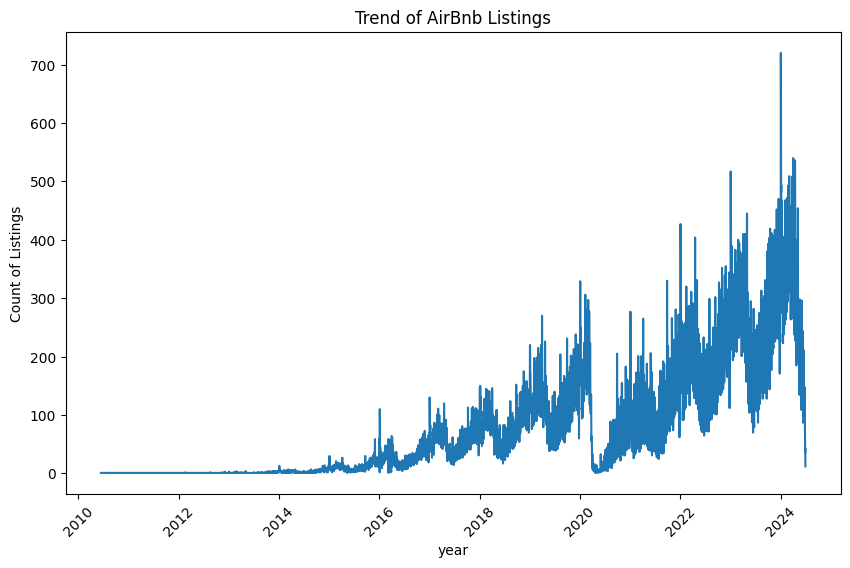

In [21]:
# Create a line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show();

This line plot shows that AirBnb listings has increased over the years.

### Host Response Time

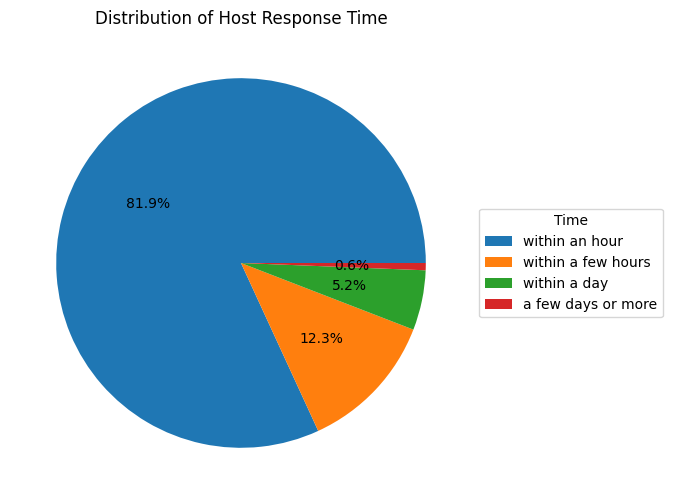

In [22]:
plt.figure(figsize=(10,6))
plt.pie(capetown_airbnb_df.host_response_time.value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Host Response Time')
plt.legend(labels = capetown_airbnb_df.host_response_time.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that most hosts respond quickly, with the vast majority (82%) responding within an hour, which could be a key selling point for Airbnb customers looking for prompt communication.

### Superhost Distribution

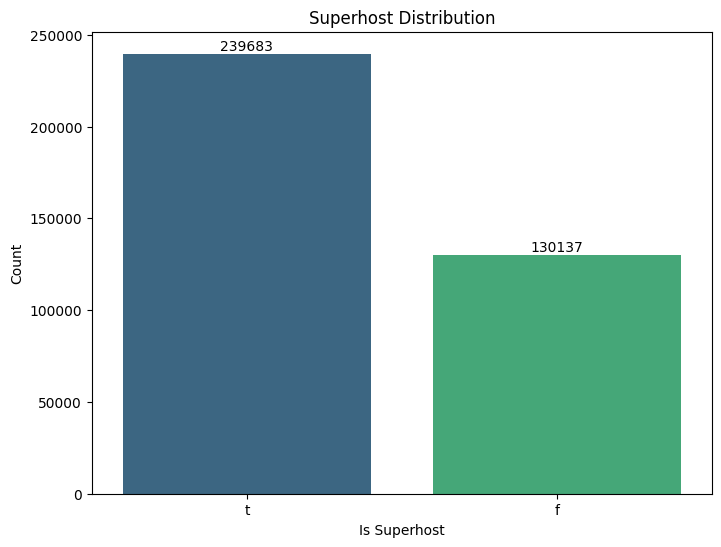

In [23]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.host_is_superhost.value_counts().index
y = capetown_airbnb_df.host_is_superhost.value_counts().values

sns.barplot(x=x, y=y, palette='viridis')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Superhost Distribution')
plt.ylabel('Count')
plt.xlabel('Is Superhost')

# Display the plot
plt.show()

The bar chart above shows that most of the host are Superhosts (239683).

### Host Verifications

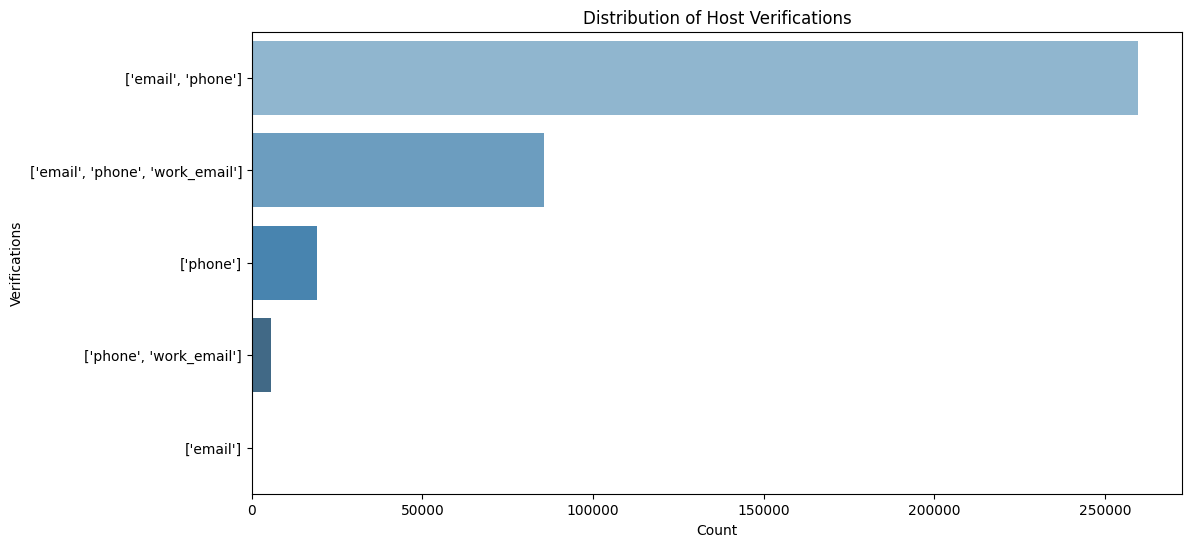

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.host_verifications.value_counts().values, y=capetown_airbnb_df.host_verifications.value_counts().index, palette="Blues_d")
plt.title('Distribution of Host Verifications')
plt.ylabel('Verifications')
plt.xlabel('Count')
plt.show()

The bar chart above shows that the majority of Airbnb hosts are verified using both email and phone, with over 300,000 instances, while fewer hosts use additional verification methods like work email.

### Host ID Verification

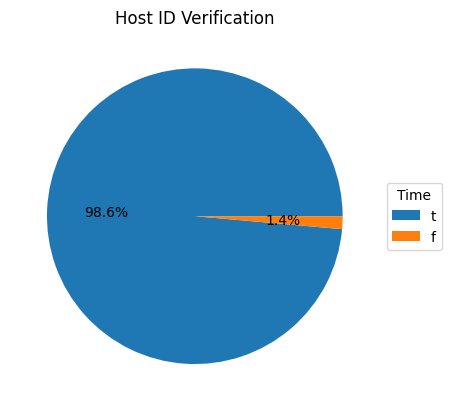

In [25]:
plt.pie(capetown_airbnb_df.host_identity_verified.value_counts(), autopct='%1.1f%%')
plt.title('Host ID Verification')
plt.legend(labels = capetown_airbnb_df.host_identity_verified.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that 98.6% of AirBnb hosts are verified hence can be trusted.

### Neighbourhood

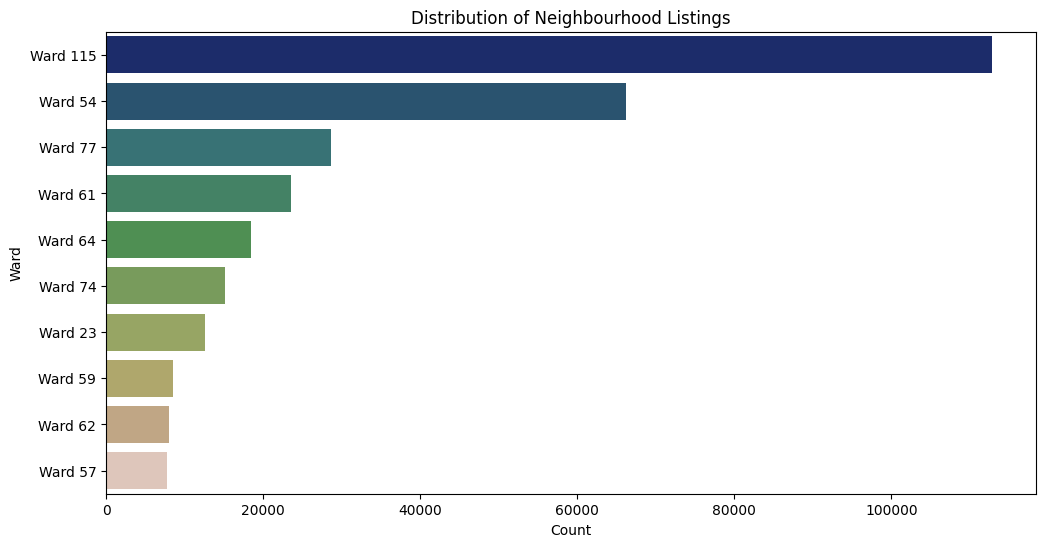

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.neighbourhood_cleansed.value_counts().values[:10], y=capetown_airbnb_df.neighbourhood_cleansed.value_counts().index[:10], palette="gist_earth")
plt.title('Distribution of Neighbourhood Listings')
plt.ylabel('Ward')
plt.xlabel('Count')
plt.show()

The bar chart above shows that Ward 115 (138191 listings), Ward 54 (78705 listings) and Ward 77 (32032 listings) have the most listings.

### Area Visualization Heatmap

In [ ]:
# use MarkerCluster
from folium.plugins import MarkerCluster

# Create map
map_center = [-33.9249, 18.4241]
m = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add points to the cluster layer
for idx, row in capetown_airbnb_df.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(marker_cluster)

# Display map
m

Buffered data was truncated after reaching the output size limit.

In [ ]:
from folium.plugins import HeatMap

# Create list of points
points = capetown_airbnb_df[['latitude', 'longitude']].values.tolist()

# Add heatmap layer
HeatMap(points).add_to(m)

In [ ]:
# Save the map
m.save('my_heatmap.html')

![Heatmap image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/heatmap.png?raw=1)

- The heatmap above shows that the highest concentration (297594 listings) appears to be in the central Cape Town area.

- Airbnbs are heavily concentrated in the tourist-friendly coastal areas and city center, with significantly less activity in the inland regions.

### Property Type

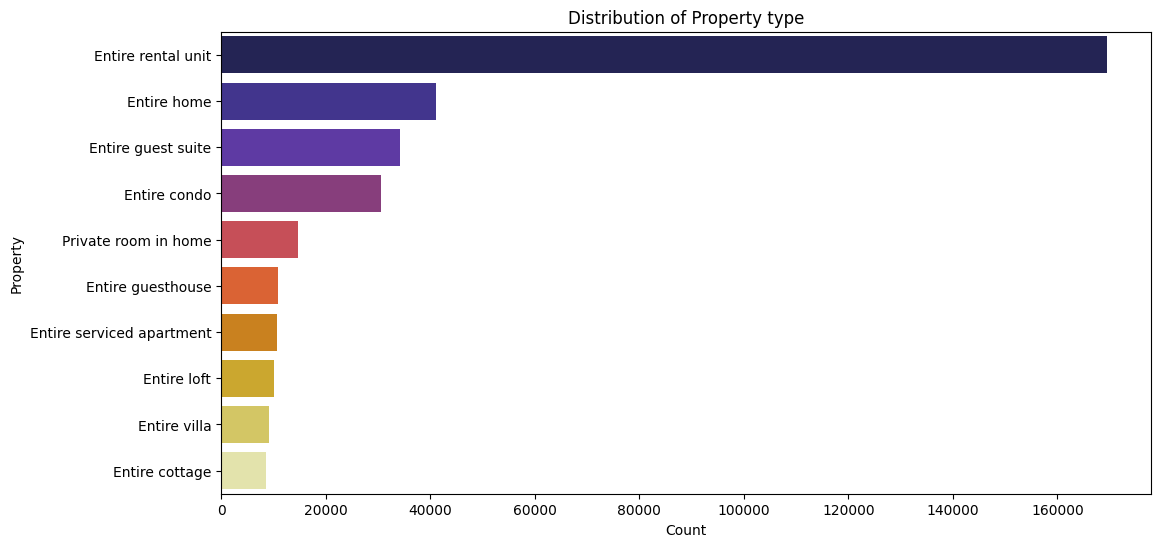

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.property_type.value_counts().values[:10], y=capetown_airbnb_df.property_type.value_counts().index[:10], palette="CMRmap")
plt.title('Distribution of Property type')
plt.ylabel('Property')
plt.xlabel('Count')
plt.show()

The bar chart above that the majority of Airbnb listings in Cape Town are entire rental units (213788), followed by entire homes (48651), while other property types like guest suites, condos, and private rooms have significantly lower representation.


### Trend in price

Next, we'll create a line chart to show trends over time. We'll group the data by month. first, let's extract the month from the date column.

In [28]:
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace('[$,]', '', regex=True).astype(float).astype(int)

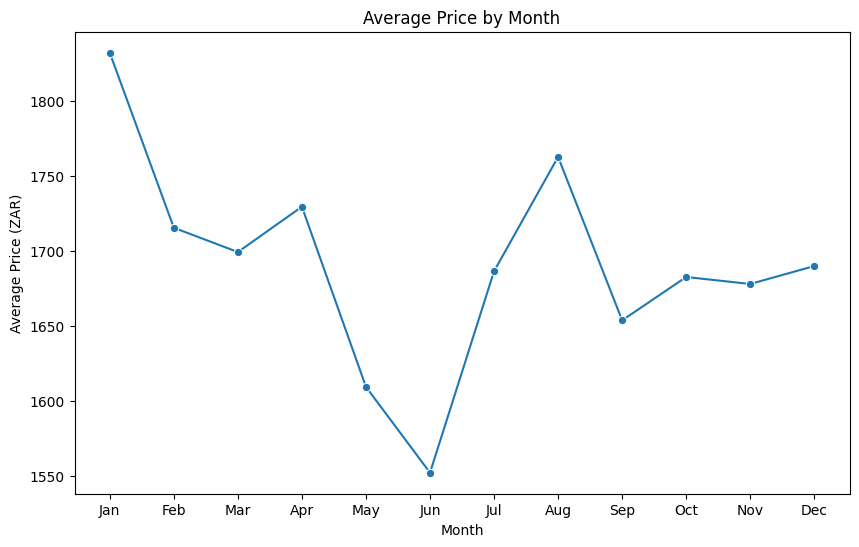

In [29]:
# month
capetown_airbnb_df['month'] = capetown_airbnb_df['date'].dt.month

# Calculate average price per month
avg_price_per_month = capetown_airbnb_df.groupby('month')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='price', data=avg_price_per_month, marker='o')

# labels and title
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (ZAR)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show();

The line chart above shows the average Airbnb prices in Cape Town month-by-month. Key trends:

1. January: Peaks around 1850 ZAR, likely due to high tourist season and summer holidays.

2. February to March: Prices drop significantly as the holiday season ends and demand decreases.

3. April to May: Fluctuation continues, leading to a low in June (~1500 ZAR), coinciding with the cooler, off-peak travel season.

4. July to August: Sharp rise, peaking in August, possibly due to winter events and regional holidays.

5. September to October: Prices dip again, reflecting a lull before the spring and summer uptick.

6. November to December: Slight upward trend as summer returns and holiday bookings start to pick up again.

### Average Price by Season

Now, we'll analyze seasonal variations in prices. First, we'll create a season column based on the listing dates, then use a bar plot to visualize the average price for each season. We'll cetegorize each month into a season (winter, spring, summer, fall).

In [30]:
# Ensuring date column is in datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# function to categorize seasons
def get_season(month):
    if month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    elif month in [12, 1, 2]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
capetown_airbnb_df['season'] = capetown_airbnb_df['date'].dt.month.apply(get_season)

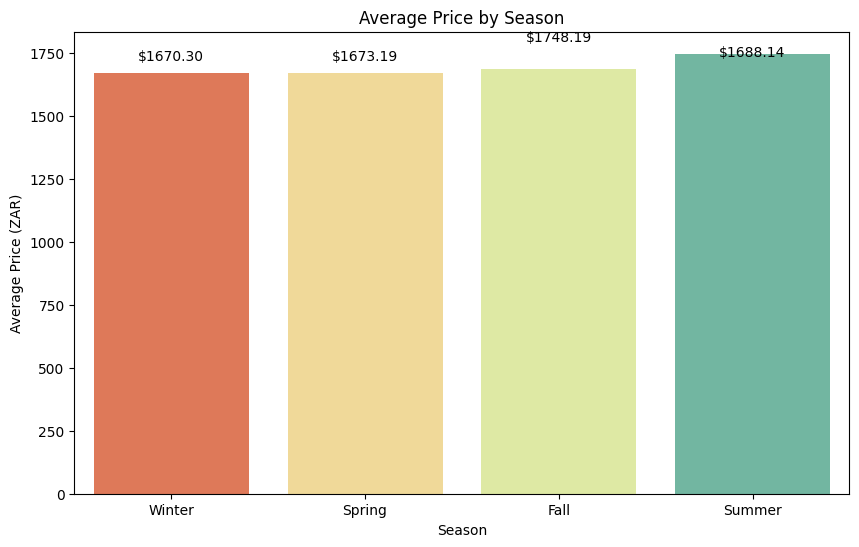

In [31]:
# Calculate average price per season
avg_price_per_season = capetown_airbnb_df.groupby('season')['price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index().sort_values(by='price')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='season', y='price', data=avg_price_per_season, palette='Spectral')

# Add labels on each bar
for index, row in avg_price_per_season.iterrows():
    barplot.text(x=index, y=row['price'] + 50, s=f"${row['price']:.2f}", ha='center', color='black')

# Add labels and title
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (ZAR)')

plt.show()

The bar chart above shows the average Airbnb prices in Cape Town by season.

Key insights:

1. Summer: Highest average price, around 1748 ZAR, indicating peak tourist season and high demand.

2. Fall: Average price of 1688 ZAR, suggesting continued strong interest.

3. Spring: Close to Fall with an average of 1673 ZAR, possibly due to milder weather and events.

4. Winter: Lowest average price, around 1670 ZAR, reflecting the off-peak season with fewer visitors.

The chart highlights that Summer is the most expensive time for Airbnb stays, likely driven by high tourist influx.

### Distribution of Price

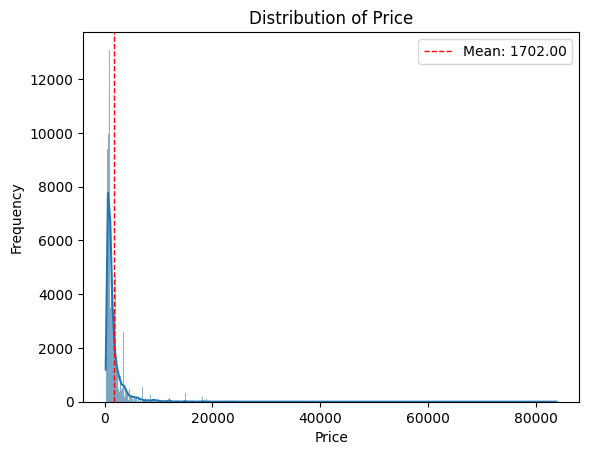

In [32]:
# mean of the 'price' column
mean_value = capetown_airbnb_df['price'].mean()

# histogram
sns.histplot(capetown_airbnb_df['price'], kde=True)

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

# Add legend and labels
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.show();

The KDE of the histogram above shows that the average price of Airbnbs in CapeTown is 1702 ZAR.

### Instant Bookable

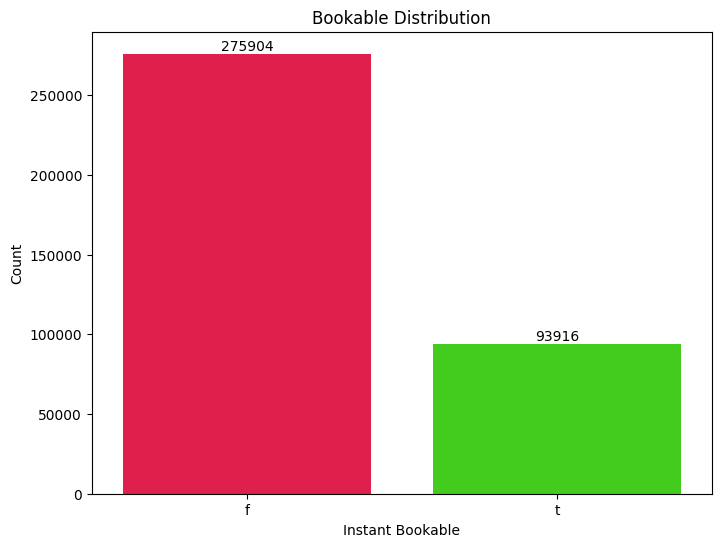

In [33]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.instant_bookable.value_counts().index
y = capetown_airbnb_df.instant_bookable.value_counts().values

sns.barplot(x=x, y=y, palette='prism_r')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Bookable Distribution')
plt.ylabel('Count')
plt.xlabel('Instant Bookable')

# Display the plot
plt.show()

- Larger portion of listings (326,965) are not instantly bookable ("f"), while a smaller number (123,225) are available for instant booking ("t").

- Many hosts may choose not to offer instant booking to maintain control over their guest selection, allowing them to screen guests, manage booking dates more effectively, or communicate specific rules before confirming a reservation.


## Bivariate Analysis

### Price v. Average Rating

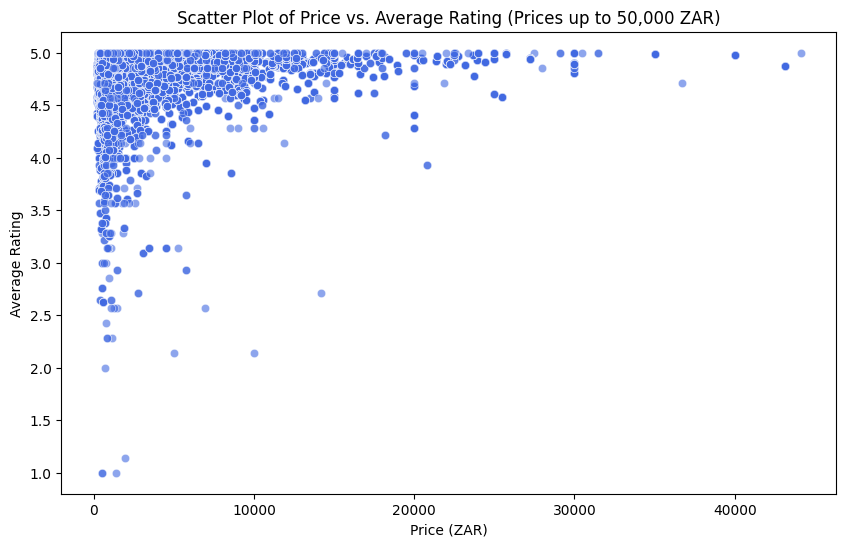

In [34]:
# Create a scatter plot to visualize the relationship between price and avg_rating
# Convert the 'price' column to numeric and remove $ sign
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filter df to include only listings with a price of up to ZAR 50,000
filtered_df = capetown_airbnb_df[capetown_airbnb_df['price'] <= 50000]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with a soft blue color and transparency for better visual appeal
sns.scatterplot(x='price', y='avg_rating', data=filtered_df, color='royalblue', alpha=0.6)

# labels,title
plt.title('Scatter Plot of Price vs. Average Rating (Prices up to 50,000 ZAR)')
plt.xlabel('Price (ZAR)')
plt.ylabel('Average Rating')
plt.show()

This scatter plot shows the relationship between the price (in ZAR) and the average rating of properties, with prices up to 50,000 ZAR.

Key observations:

- The majority of properties, regardless of price, have high average ratings, clustering around 4.0 to 5.0.
- Fewer properties have lower average ratings (below 3.0), spread across various price points.
- No clear trend indicates that higher prices correlate with higher average ratings or vice versa.
- There's a dense concentration of items with prices below 2,000 ZAR and ratings between 4.0 and 5.0.

This scatter plot shows that high ratings are common across a wide range of prices.

### Price v. Property Type

In [35]:
# group property and price to see the correlation
property_price = capetown_airbnb_df.groupby('property_type')['price'].mean().sort_values(ascending=False)
property_price.head()

,price
property_type,
Entire villa,8349.156880
Entire home,3317.354410
Barn,2755.000000
Entire bungalow,2743.811584
Entire cabin,2496.771400


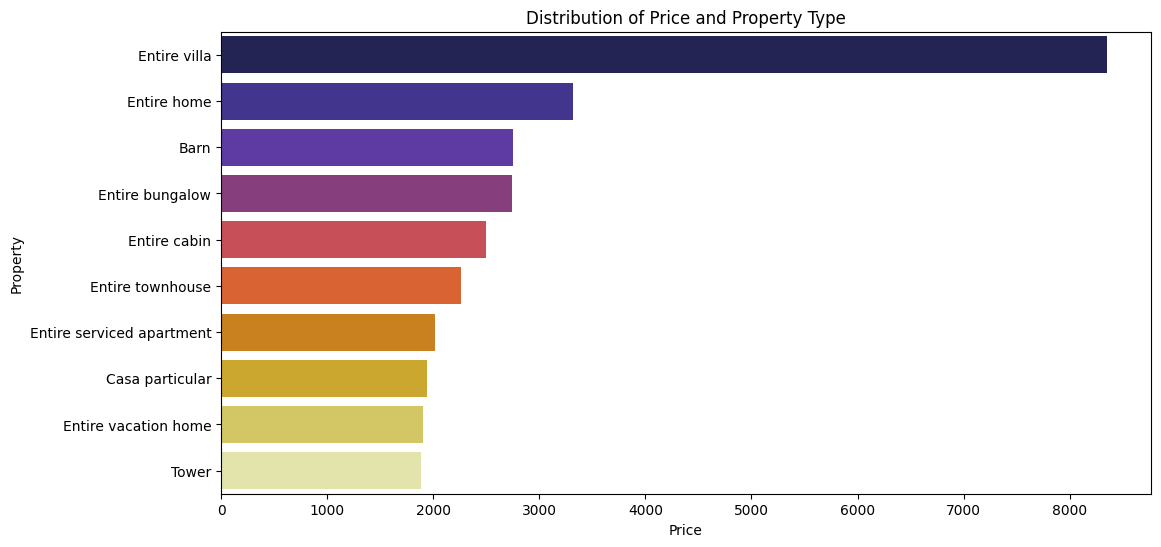

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=property_price.values[:10], y=property_price.index[:10], palette="CMRmap")
plt.title('Distribution of Price and Property Type')
plt.ylabel('Property')
plt.xlabel('Price')
plt.show()

The bar chart above shows that booking an entire villa is the most expensive with (over $8000), followed by the entire home and Barn.

### Average Ratings of Superhosts vs. Non-Superhosts

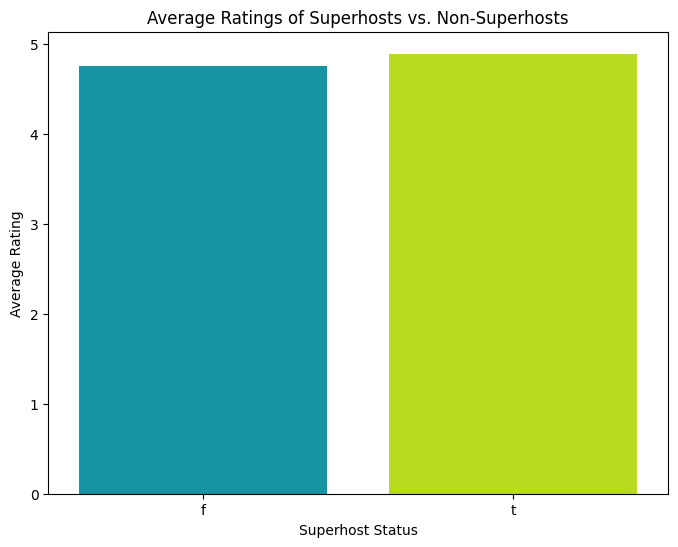

In [37]:
# bar chart to compare avg_rating between superhosts and non-superhosts
# Calculate the mean avg_rating for superhosts and non-superhosts
avg_ratings = capetown_airbnb_df.groupby('host_is_superhost')['avg_rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='host_is_superhost', y='avg_rating', data=avg_ratings, palette='nipy_spectral')

# labels, title
plt.title('Average Ratings of Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

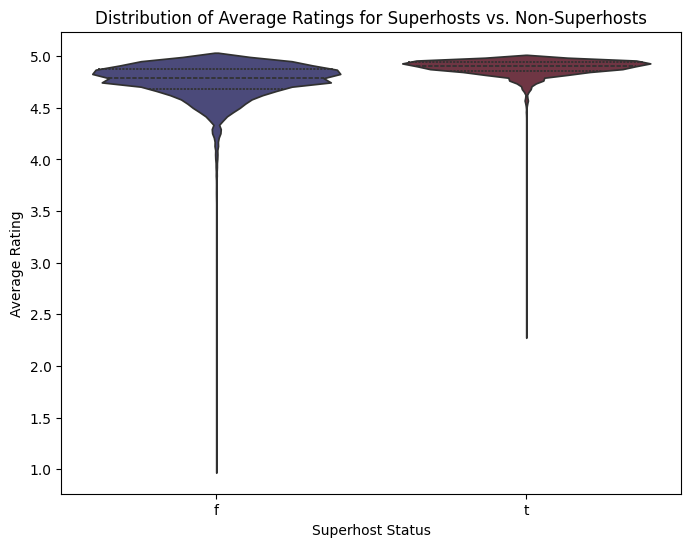

In [38]:
# violin plot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df, inner='quartile', palette='icefire')

# labels and title
plt.title('Distribution of Average Ratings for Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

The above plot shows that superhosts have ratings that are more concentrated towards the higher end, close to 5.0, indicating consistently high ratings. For Non-superhosts, their ratings are more spread out, with some tailing towards lower ratings, showing a wider variation in guest satisfaction. This suggests that superhosts generally receive higher and more consistent ratings compared to non-superhosts.

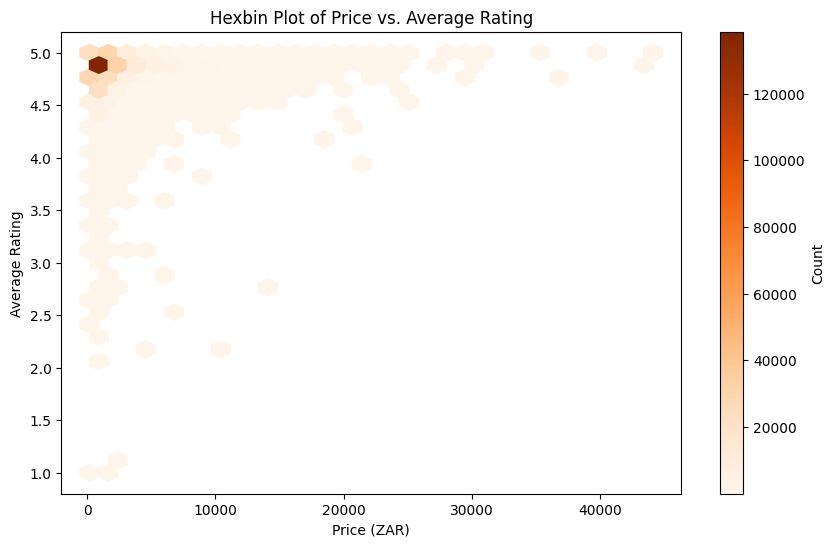

In [39]:
# hexbin plot to visualize the relationship between price and avg_rating
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['price'], filtered_df['avg_rating'], gridsize=30, cmap='Oranges', mincnt=1)

# color bar, labels, title
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Price vs. Average Rating')
plt.xlabel('Price (ZAR)')
plt.ylabel('Average Rating')
plt.show()

Key insights from the hexbin plot above:

- Concentration of High Ratings: There's a high density of properties with prices between 0 and 2,000 ZAR, which have average ratings between 4.5 and 5.0.
- Higher Prices, Fewer Data Points: As the price increases, the density of data points decreases, indicating fewer properties are available at higher price ranges.

In essence, most highly rated properties are clustered in the lower price range.

### Listing Descriptions (Names) v. Price Category - WordCloud

In [40]:
# Define stopwords
stopwords_n = set(["the", "in", "and", "of", "to", "a", "is", "cape town", "with", "cape", "town"])

# Generate word clouds for each price range
# High price listings
high = capetown_airbnb_df[capetown_airbnb_df['price'] >= 10000]
high_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='spring'
).generate(" ".join(word for word in high['name'].str.lower()))

# Low price listings
low = capetown_airbnb_df[capetown_airbnb_df['price'] <= 1000]
low_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='Pastel1'
).generate(" ".join(word for word in low['name'].str.lower()))

# Intermediate price listings
inter = capetown_airbnb_df[(capetown_airbnb_df['price'] > 1000) & (capetown_airbnb_df['price'] < 10000)]
int_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='winter'
).generate(" ".join(word for word in inter['name'].str.lower()))

# All price categories
allprices_wc = WordCloud(
    max_font_size=500, background_color="white", collocations=False,
    stopwords=stopwords_n, max_words=75, colormap='icefire_r'
).generate(" ".join(word for word in capetown_airbnb_df['name'].str.lower()))

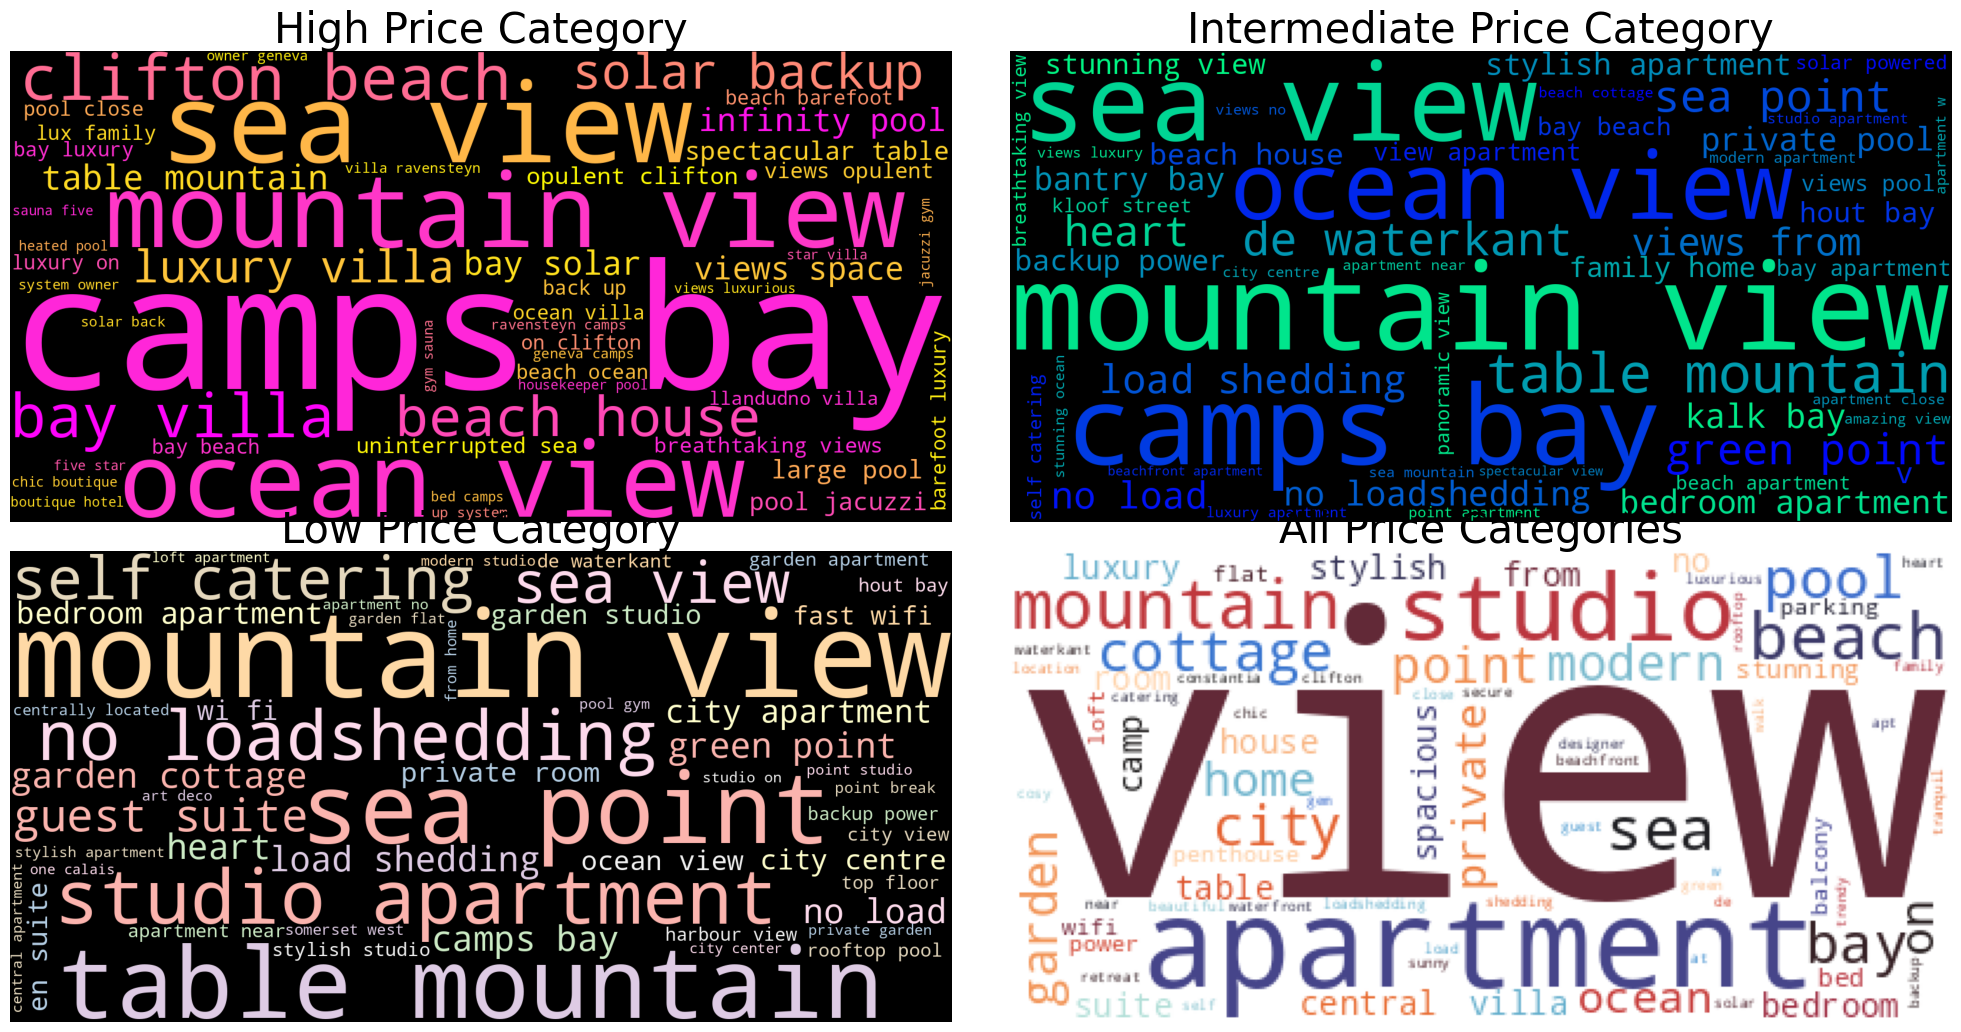

In [41]:
# Plot the word clouds
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.tight_layout(pad=0)

axs[0, 0].imshow(high_wc)
axs[0, 0].set_title('High Price Category', fontsize=30)
axs[0, 0].axis('off')

axs[0, 1].imshow(int_wc)
axs[0, 1].set_title('Intermediate Price Category', fontsize=30)
axs[0, 1].axis('off')

axs[1, 0].imshow(low_wc)
axs[1, 0].set_title('Low Price Category', fontsize=30)
axs[1, 0].axis('off')

axs[1, 1].imshow(allprices_wc)
axs[1, 1].set_title('All Price Categories', fontsize=30)
axs[1, 1].axis('off')

plt.show()

Key Insights:

- High Priced Listings: Villas and houses near the beach (sea, bay, beach, luxury). Camps Bay is also frequently mentioned which is an affluent suburb on the West Coast.

- Intermediate Priced Listings: Villas, family homes, houses, cottages. Camps bay is also mentioned along with proximity to the beach and mountain views. This signals that we are moving further inland to be able to have 'mountain views' as Table mountain is on the coast.

- Low Priced Listings are described as studio apartment, garden cottage, and self catering accomodation. Mountain views and words depicting the tourist attractions are a lot smaller, which is intuitive as the prices are lower.

## Multivariate Analysis

### Heatmap of Correlation Matrix

The heatmap will help us visualize the correlations between numeric variables in the dataset, highlighting how they relate to each other.

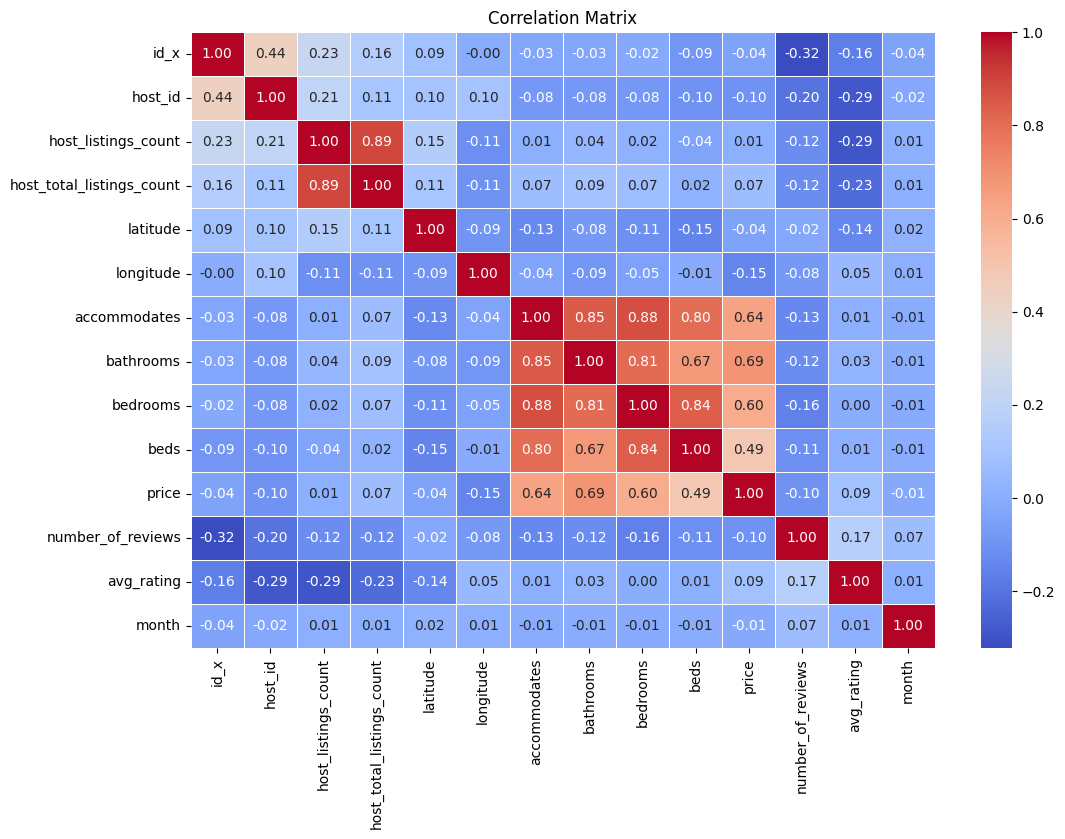

In [42]:
# Filter the dataframe to select only numeric columns
numeric_df = capetown_airbnb_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between numerical features within the dataset:

- Strong positive correlations are observed among variables related to the number of beds, bedrooms, and accommodates, indicating that larger accommodations have more beds and bedrooms.

- There is a moderate positive correlation between `price` and `accommodates`, suggesting that listings accommodating more people tend to have higher prices.

- Variables such as `host_response_rate` and `host_is_superhost` show minimal correlation with other features, indicating they may be less influential in determining property characteristics or price.

### Pairplot for Selected Features

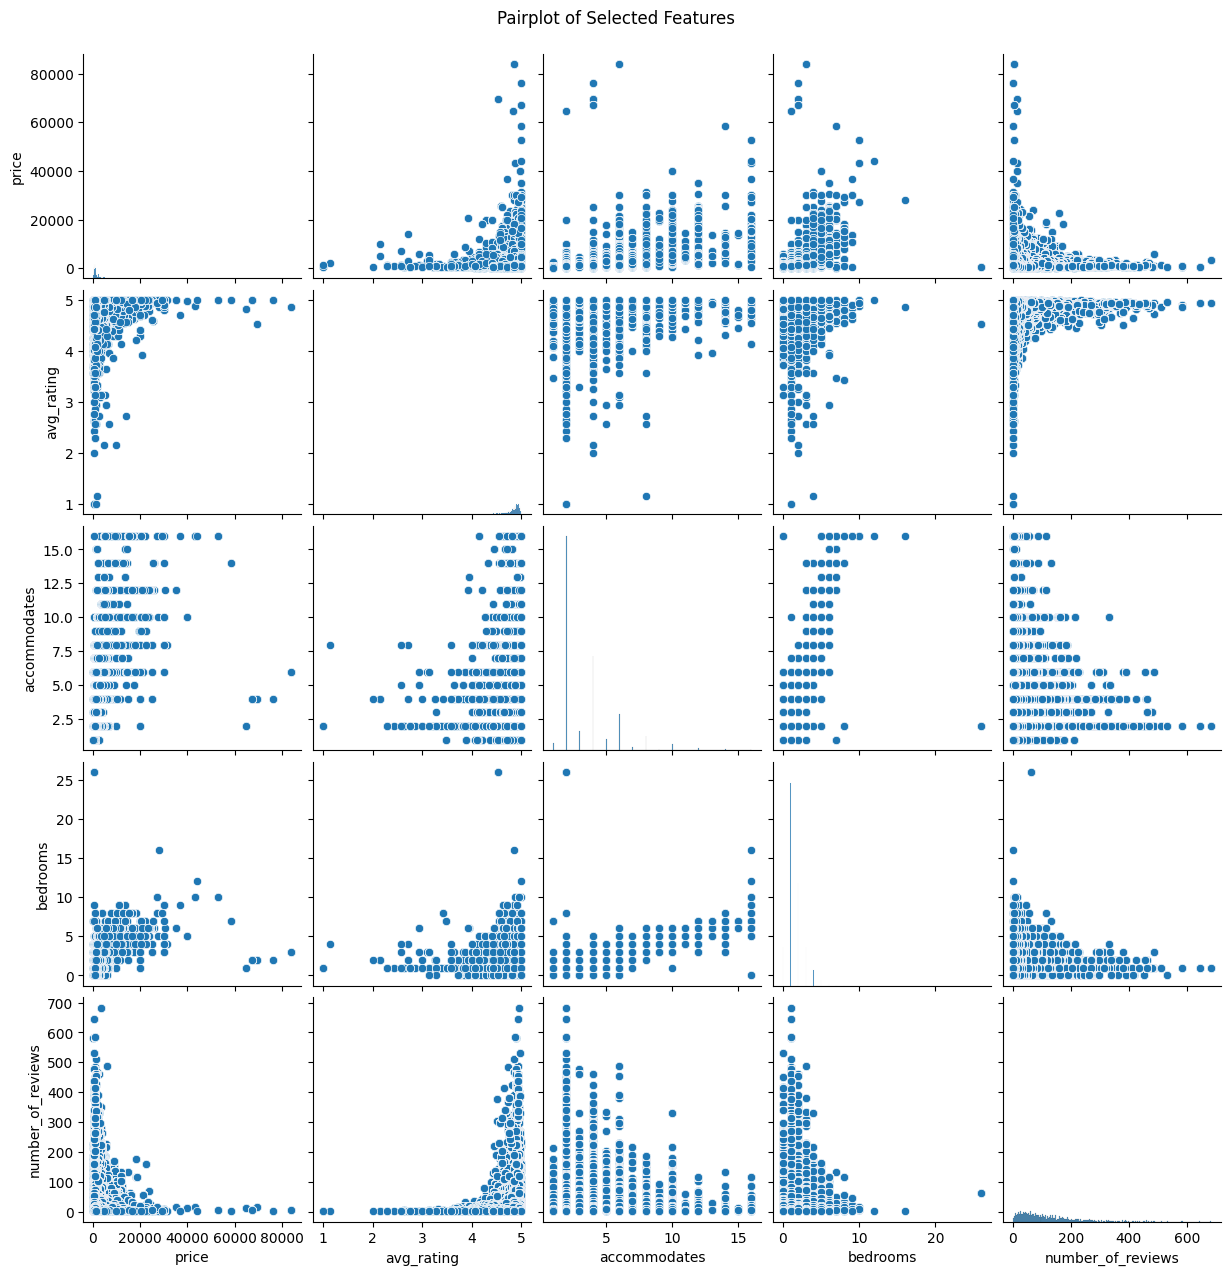

In [43]:
# Selecting a subset of features for pairplot
selected_features = capetown_airbnb_df[['price', 'avg_rating', 'accommodates', 'bedrooms', 'number_of_reviews']]

# Create pairplot
sns.pairplot(selected_features)
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust the title position
plt.show()

The pair plot reveals the scatter and density distributions for multiple features:

- `price` and `accommodates` show a positive trend, where higher accommodation capacity corresponds to higher prices.

- Density distributions reveal right-skewness in variables like `price`, `number_of_reviews`, and `accommodates`, indicating that most properties are in the lower ranges for these features.

- Some features exhibit clustering patterns, such as `beds` and `bedrooms`, where properties with similar accommodation features tend to cluster together.

### Boxplot to Compare Ratings Across Property Types

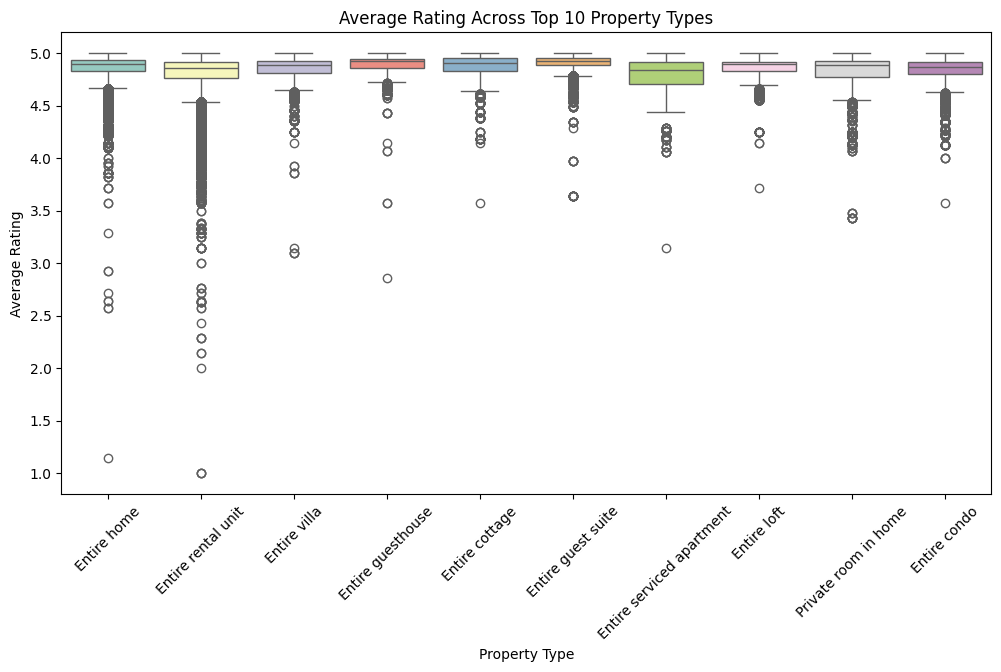

In [44]:
# Count the occurrences of each property type
property_counts = capetown_airbnb_df['property_type'].value_counts()

# Select the top 10 most common property types
top_property_types = property_counts.nlargest(10).index

# Filter the DataFrame for the top property types
filtered_df = capetown_airbnb_df[capetown_airbnb_df['property_type'].isin(top_property_types)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='avg_rating', data=filtered_df, palette='Set3')

# Add labels and title
plt.title('Average Rating Across Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The box plot illustrates the spread and outliers of ratings across various property types:

- Median ratings are generally high across most property types, but there are variations in spread. For example, apartments tend to have a more concentrated distribution, whereas other types like villas show more variation in ratings.

- Outliers exist for most property types, with some listings receiving lower ratings compared to the majority.

- This distribution suggests that while ratings are generally positive, there are differences in guest satisfaction across property types, possibly influenced by amenities, location, or quality of service.

### Bar Plot for Average Price by Property Type

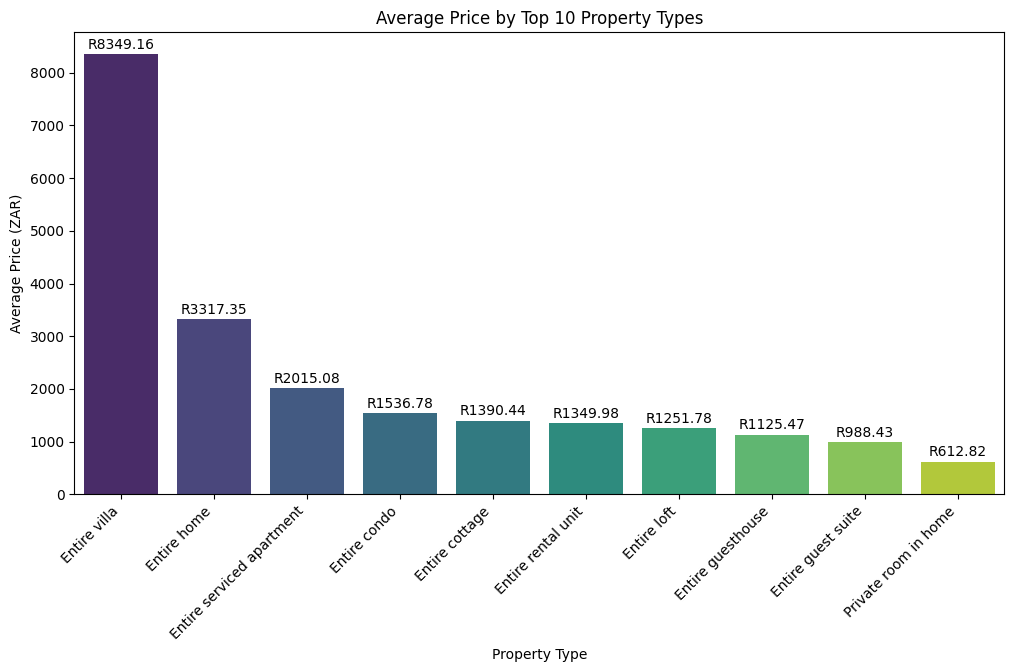

In [45]:
# Count the occurrences of each property type
property_counts = capetown_airbnb_df['property_type'].value_counts()

# Select the top 10 most common property types
top_property_types = property_counts.nlargest(10).index

# Calculate average price for top property types
avg_price_per_property_type = capetown_airbnb_df[capetown_airbnb_df['property_type'].isin(top_property_types)] \
    .groupby('property_type')['price'].mean().reset_index()

# Sort values for better visualization
avg_price_per_property_type = avg_price_per_property_type.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='property_type', y='price', data=avg_price_per_property_type, palette='viridis')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add dollar sign and format price to 2 decimal places
for i, price in enumerate(avg_price_per_property_type['price']):
    barplot.text(i, price + 50, f"R{price:.2f}", ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Average Price by Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Price (ZAR)')
plt.show()

### Removing Price Outliers

Next, we'll use the 1.5 IQR (Interquartile Range) rule to identify and remove outliers from the 'price' column in our dataframe. First, we calculate the first quartile (Q1) and the third quartile (Q3) of the 'price' column. The difference between these two values gives us the IQR, which measures the spread of the middle 50% of our data.

Next, we define our lower and upper bounds for what we consider normal 'price' values. Specifically, any values below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` are flagged as outliers. We then filter the dataframe to include only those rows where 'price' values fall within this range, storing the filtered data in capetown_airbnb_df_no_outliers.

Finally, we print out the number of outliers removed from our dataset. By applying this approach, we reduce the impact of extreme price values, which can distort our model performance and statistical summaries.

In [46]:
# Calculate Q1 and Q3 for the 'price' column
Q1 = capetown_airbnb_df['price'].quantile(0.25)
Q3 = capetown_airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on the IQR rule
capetown_airbnb_df_no_outliers = capetown_airbnb_df[(capetown_airbnb_df['price'] >= lower_bound) & (capetown_airbnb_df['price'] <= upper_bound)]

print(f"Removed {capetown_airbnb_df.shape[0] - capetown_airbnb_df_no_outliers.shape[0]} outliers from 'price'")

Removed 37080 outliers from 'price'


## **Feature Engineering**

In our merged dataframe, each listing can have multiple reviews, leading to duplicate rows for the same listing. To create our baseline linear regression model, we'll first aggregate the data to ensure each listing appears only once.

In [47]:
# Aggregate data to avoid duplicate rows caused by multiple reviews for the same property
capetown_aggregated_df = (
    capetown_airbnb_df_no_outliers
    .groupby('id_x')
    .agg({
        'host_id': 'first', # Host-related features are constant per listing, so we take the first occurrence
        'host_response_rate': 'first',
        'host_is_superhost': 'first',
        'host_listings_count': 'first',
        'accommodates': 'mean', # we average numerical features across all property info
        'bathrooms': 'mean',
        'bedrooms': 'mean',
        'beds': 'mean',
        'price': 'first', # is taken as the first occurrence since it is consistent across reviews
        'avg_rating': 'mean', # averaged across all reviews
        'number_of_reviews': 'sum',
        'neighbourhood': 'first',
        'property_type': 'first'
    })
    .reset_index()
)

In [48]:
# Step 2: Clean 'host_response_rate' by removing '%' and converting to numeric
capetown_aggregated_df['host_response_rate'] = (
    capetown_aggregated_df['host_response_rate']
    .str.rstrip('%')  # Remove '%' symbol
    .astype(float) / 100  # Convert to float and scale to [0, 1]
)

Next, we cap the price values at a maximum of 10,000 ZAR to handle outliers and ensure that extremely high prices do not disproportionately affect our model.

In [49]:
# Clip price values to a maximum of 10,000
capetown_aggregated_df['price'] = capetown_aggregated_df['price'].clip(upper=10000)

In [50]:
# Frequency Encoding for 'neighbourhood' and 'property_type'
# Each had 190 and 60 unique values respectively, therefore couldn't use one-hot encoding
for col in ['neighbourhood', 'property_type']:
    freq_encoding = capetown_aggregated_df[col].value_counts(normalize=True)
    capetown_aggregated_df[f'{col}_freq'] = capetown_aggregated_df[col].map(freq_encoding)

In [51]:
# Encode 'host_is_superhost' as binary (0 and 1)
capetown_aggregated_df['host_is_superhost'] = capetown_aggregated_df['host_is_superhost'].map({'t': 1, 'f': 0})

In [52]:
# Drop original 'neighbourhood' and 'property_type' columns,
# because frequency-encoded columns are now included
capetown_aggregated_df = capetown_aggregated_df.drop(['neighbourhood', 'property_type'], axis=1)

In [53]:
# Define features (X) and target variable (y)
# Exclude id and target column
X = capetown_aggregated_df.drop(['id_x', 'price'], axis=1)
y = capetown_aggregated_df['price']

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Baseline Model: Linear Regression**

In [55]:
# Train the baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Evaluate the model with RMSE for both train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Baseline Model Train RMSE: {train_rmse}")
print(f"Baseline Model Test RMSE: {test_rmse}")
print(f"Baseline Model R^2 Score: {r2}")

Baseline Model Train RMSE: 556.2145535680496
Baseline Model Test RMSE: 530.7839704597545
Baseline Model R^2 Score: 0.42931188527435893


This initial model provides a starting benchmark, with moderate predictive power based on linear relationships. The Train RMSE of 556 and Test RMSE of 530 indicate that the model captures general trends but has room for improvement in predictive accuracy. With an R² score of 0.429, the model explains approximately 43% of the variance in the test data, suggesting that additional feature engineering or alternative modeling approaches could potentially enhance performance.

### **Linear Regression (with PCA and Scaling)**

Next, we scale the features using StandardScaler to standardize the range of the data, ensuring that all features contribute equally to the model.

In [56]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, we reduce the dimensionality of the data using PCA to retain the most important features, simplifying the model while preserving essential information.

In [57]:
# Reduce dimensionality with PCA
pca = PCA(n_components=10)  # Sets the number of components we want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [58]:
# Train the Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train_pca, y_train)

# Make predictions on both the training and test sets
y_train_pred = baseline_model.predict(X_train_pca)
y_test_pred = baseline_model.predict(X_test_pca)

# Evaluate the baseline model with RMSE for both train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

In [60]:
print(f"Linear Regression with PCA Train RMSE: {train_rmse}")
print(f"Linear Regression with PCA Test RMSE: {test_rmse}")
print(f"Baseline Model R^2 Score: {r2}")

Linear Regression with PCA Train RMSE: 562.5927945004149
Linear Regression with PCA Test RMSE: 531.3669094629645
Baseline Model R^2 Score: 0.4280576686367079


The Linear Regression model with Standard Scaling and PCA achieved a Train RMSE of 562.6, Test RMSE of 531.4, and an R² score of 0.428—very close to the baseline results. The slightly higher RMSE suggests suggests that the initial dataset likely does not benefit significantly from dimensionality reduction in this case. This highlights that PCA may not enhance model performance in this dataset but still reduces feature complexity.

### **Decision Tree Model**

In [76]:
# Initialize the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Train the model
decision_tree_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = decision_tree_regressor.predict(X_train)
y_test_pred_dt = decision_tree_regressor.predict(X_test)

# Calculate RMSE
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

# Step 6: Print results
print(f"Decision Tree Model Train RMSE: {train_rmse_dt}")
print(f"Decision Tree Model Test RMSE: {test_rmse_dt}")

Decision Tree Model Train RMSE: 522.9930375566587
Decision Tree Model Test RMSE: 526.2242084135602


The Decision Tree model produced a Train RMSE of approximately 523 and a Test RMSE of around 526. These results indicate that the model is performing relatively well, with minimal overfitting since the training and test RMSE values are closely aligned.

In comparison to the linear regression model with scaling, the Decision Tree demonstrates slightly better predictive performance. This suggests that the Decision Tree may be capturing more complex relationships within the data compared to the linear regression model. Overall, the Decision Tree offers a competitive alternative, providing a solid balance between accuracy and interpretability.

### KNN Regression Model

In [66]:
# Initialize KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=13, metric='euclidean')

# Train the model on the training data
knn_regressor.fit(X_train_pca, y_train)

# Make predictions on the training set
y_train_pred_knn = knn_regressor.predict(X_train_pca)

# Make predictions on the test set
y_test_pred_knn = knn_regressor.predict(X_test_pca)

# Calculate RMSE for the training and test sets
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

# Print RMSE
print(f"KNN Regression Model Train RMSE: {train_rmse_knn}")
print(f"KNN Regression Model Test RMSE: {test_rmse_knn}")

KNN Regression Model Train RMSE: 502.9304532874905
KNN Regression Model Test RMSE: 518.3970065268516


The KNN Regression Model showed improvement over the baseline, with a Train RMSE of 502 and a Test RMSE of 518. By using neighborhood-based methods, this model offers slightly enhanced predictive accuracy, benefiting from similarity-based predictions.

### Tuned KNN Regression Model

In [73]:
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# parameter grid for tuning
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'metric': ['euclidean', 'manhattan', 'minkowski']  # distance metrics
}

# Initialize KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

# Initialize GridSearchCV to search for best parameters
grid_search = GridSearchCV(
    knn_regressor,
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model from grid search
best_knn_regressor = grid_search.best_estimator_

# Make predictions using the optimized model
y_train_pred_knn = best_knn_regressor.predict(X_train_scaled)
y_test_pred_knn = best_knn_regressor.predict(X_test_scaled)

# Calculate RMSE for training and test sets
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"KNN Regression Model Train RMSE: {train_rmse_knn}")
print(f"KNN Regression Model Test RMSE: {test_rmse_knn}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}
KNN Regression Model Train RMSE: 474.5572224014016
KNN Regression Model Test RMSE: 515.805269974283


The tuned KNN regression model has shown improvement with the new configuration. Using a Manhattan distance metric and optimizing with 10 neighbors, the model achieved a Train RMSE of approximately 475 and a Test RMSE of about 515. This adjustment indicates a better balance between bias and variance, suggesting improved predictive performance on the test data.

### Random Forest Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Cross-Validation (10 splits, 3 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best RandomForestRegressor model
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_pred_rf = best_rf_regressor.predict(X_train_scaled)
y_test_pred_rf = best_rf_regressor.predict(X_test_scaled)

# Calculate RMSE for train and test sets
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Print the best parameters and RMSE results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Random Forest Train RMSE: {train_rmse_rf}")
print(f"Random Forest Test RMSE: {test_rmse_rf}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Train RMSE: 269.5318835365133
Random Forest Test RMSE: 483.1323034684638


The Random Forest Model has achieved the lowest errors so far, with a Train RMSE of 269.53 and a Test RMSE of 483.13. This result marks a substantial improvement, showing that the ensemble approach captures complex patterns more effectively. Given the strong performance here, additional exploration with ensemble models like XGBoost could further refine accuracy.

### **XGBoost Model**

In [82]:
# Initialize the XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xgboost_regressor.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred_xgb = xgboost_regressor.predict(X_train)
y_test_pred_xgb = xgboost_regressor.predict(X_test)

# Calculate RMSE
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Print results
print(f"XGBoost Model Train RMSE: {train_rmse_xgb}")
print(f"XGBoost Model Test RMSE: {test_rmse_xgb}")

XGBoost Model Train RMSE: 414.862152066905
XGBoost Model Test RMSE: 486.63298211362377


In [86]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a refined parameter grid
param_grid = {
    'n_estimators': [100, 200],            # Moderate values to prevent long runtime
    'max_depth': [3, 5, 7],                # Control tree depth
    'learning_rate': [0.01, 0.05, 0.1],    # Smaller learning rates
    'subsample': [0.7, 0.8, 1.0],          # Subsampling to reduce overfitting
    'colsample_bytree': [0.7, 0.8, 1.0],   # Column sampling per tree
    'gamma': [0, 0.1, 0.2],                # Minimum loss reduction required for further splits
    'reg_alpha': [0, 0.01, 0.1],           # L1 regularization
    'reg_lambda': [1, 1.5, 2.0]            # L2 regularization
}

# Initialize the XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# K-Fold Cross-Validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV without eval_metric and early stopping
grid_search = GridSearchCV(
    estimator=xgboost_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,  # Use all available cores
    verbose=1   # Track progress
)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_xgboost_regressor = grid_search.best_estimator_

# Fit the best model with early stopping on training data
best_xgboost_regressor.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],   # Validate on test set
    eval_metric='rmse',
    early_stopping_rounds=10,      # Stop if performance doesn't improve for 10 rounds
    verbose=True
)

# Make predictions using the optimized model
y_train_pred_xgb = best_xgboost_regressor.predict(X_train)
y_test_pred_xgb = best_xgboost_regressor.predict(X_test)

# Calculate RMSE for training and test sets
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"XGBoost Model Train RMSE: {train_rmse_xgb}")
print(f"XGBoost Model Test RMSE: {test_rmse_xgb}")

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'